In [142]:
import os
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import pandas as pd
import numpy as np
import seaborn as sns



sns.set_style('white')
sns.set_context('notebook')

def plot_style(figsize=(12, 6), labelsize=20, titlesize=24, ticklabelsize=14, **kwargs):
   basic_style = {
       'figure.figsize': figsize,
       'axes.labelsize': labelsize,
       'axes.titlesize': titlesize,
       'xtick.labelsize': ticklabelsize,
       'ytick.labelsize': ticklabelsize,
       'axes.spines.top': False,
       'axes.spines.right': False,
       'axes.spines.left': False,
       'axes.grid': False,
       'axes.grid.axis': 'y',
   }
   basic_style.update(kwargs)
   return plt.rc_context(rc=basic_style)

blue = sns.xkcd_rgb['ocean blue']

## Get tree and pmat data

In [94]:
scite_input_path = '../../../mt-SCITE/mt-SCITE_output/stdout/'
scite_stdout_filenames = list(glob(os.path.join(scite_input_path, '*.txt')))

In [101]:
pmat_input_path = '../../data/P9855_matrix_output/'
pmats = list(glob(os.path.join(pmat_input_path, '*.csv')))

In [95]:
# Get experiment IDs
experiments = []
for filename in sorted(scite_stdout_filenames):
    name = os.path.basename(filename).split('-')[0].rsplit('.', 2)[0]
    experiments.append(name)

In [139]:
# Get log likelihood scores
lhood = []
for filename in sorted(scite_stdout_filenames):
    file = open(filename, "r")
    for line in file:
        if 'best log score for tree:' in line:
            score = line.split('	')[1].rstrip()
            lhood.append(score)

In [140]:
# Get n mutations
n_mut = []
for filename in sorted(pmats):
    file = open(filename, "r")
    n = len(file.readlines())
    n_mut.append(n)

In [141]:
# Create df
tree_data = pd.DataFrame(experiments)
tree_data['lhood'] = lhood
tree_data['n_muts'] = n_mut
tree_data['lhood'] = tree_data['lhood'].astype(float)
tree_data['lhood_mut'] = tree_data['lhood']/tree_data['n_muts']
tree_data = tree_data.rename(columns={0: 'error_rate'})
tree_data = tree_data.set_index('error_rate')
tree_data

,lhood,n_muts,lhood_mut
error_rate,,,
0.0001,-1665.747970,193,-8.630818
0.0002,-389.108193,66,-5.895579
0.0003,-129.650810,41,-3.162215
0.0004,-124.117935,34,-3.650527
0.0005,-105.449658,34,-3.101461
0.0006,-58.557062,30,-1.951902
0.0007,-38.863853,28,-1.387995
0.0008,-33.511933,26,-1.288921
0.0009,-34.055324,24,-1.418972


In [143]:
## Plots

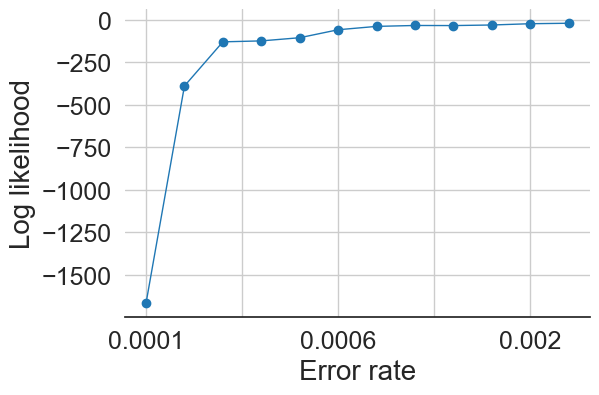

In [135]:
with plot_style(figsize=(6, 4), ticklabelsize=18, labelsize=20):
    tree_data.lhood.plot(marker='o', lw=1)
    plt.grid(axis='both')
    #plt.xscale('log')
    plt.xlabel('Error rate')
    plt.ylabel('Log likelihood')
    #plt.savefig('figs/performance/train_atac_log_lhood.png', dpi=300)

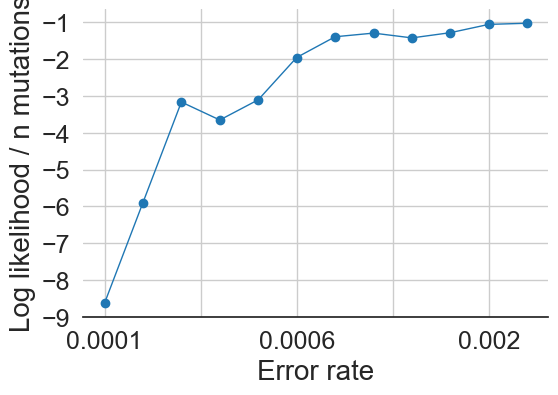

In [138]:
with plot_style(figsize=(6, 4), ticklabelsize=18, labelsize=20):
    tree_data.lhood_mut.plot(marker='o', lw=1)
    plt.grid(axis='both')
    #plt.xscale('log')
    plt.xlabel('Error rate')
    plt.ylabel('Log likelihood / n mutations')
    #plt.savefig('figs/performance/train_atac_log_lhood.png', dpi=300)